In [33]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.linalg as lin

import os
from scipy.io import loadmat, savemat

In [34]:
save_dir = r"C:\Users\20173928\OneDrive - TU Eindhoven\Documents\Master\thesis\mscth\data"
out = loadmat(os.path.join(save_dir,'Silverbox_u_upsampled.mat'))
u = out['u']

In [35]:
def fSimSilverboxSQUARE(u,x0,th,Ts):

    a2 = th[0]
    b1 = th[1]
    b2 = th[2]
    b3 = th[3]
    b4 = th[4]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*a2*x2[k]
        x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*x1[k]**2 +b3*x2[k] + b4*u[k])
        y[k+1] = x1[k+1]
    
    
    x = np.c_[x1, x2]
    return x, y

In [36]:
# increased size of data
u = u[1000000:2500000]
u = (u-np.mean(u))/(np.max(u)-np.min(u))

In [37]:
# coefficients for [-0.5, 0.5] data
# with aliasing
#[ 1.,         -2.3, -2.1, -2.3,  0.67] # with x2 fact 1
th = np.array([ 1.4, -1.8, -3.0,  -2.1,  0.15])

x0 = [0, 0]
Ts = 1

x, y = fSimSilverboxSQUARE(u, x0, th, 1)

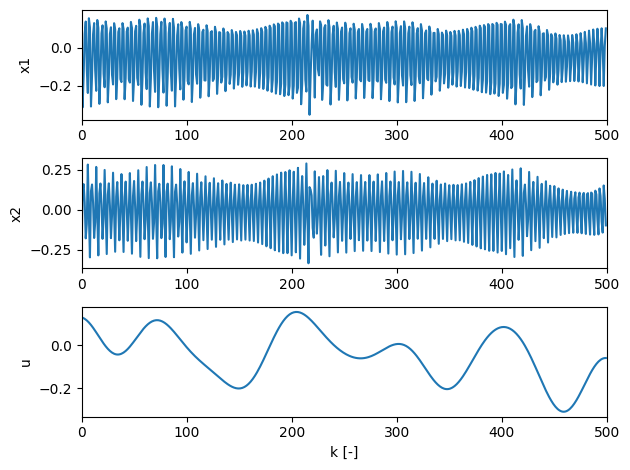

In [38]:
nprint = 500
istart = 2000

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
# Plot on each subplot
ax1.plot(x[istart:istart+nprint,0])
ax1.set_ylabel("x1")
ax1.set_xlim([0, nprint])
ax2.plot(x[istart:istart+nprint,1])
ax2.set_ylabel("x2")
ax2.set_xlim([0, nprint])
ax3.plot(u[istart:istart+nprint])
ax3.set_ylabel("u")
ax3.set_xlim([0, nprint])
ax3.set_xlabel("k [-]")
# Adjust layout (optional)
plt.tight_layout()
# Display the plot
plt.show()

In [39]:
# check if solveable with LSQ
input = x[:-1,:]
output = x[1:,:]

u_input = u[:-1]
Theta = np.c_[input[:,0], input[:,1], u_input, input[:,0]**2]

coeff, _, _, _ = lin.lstsq(Theta, output)
print("LSTSQ: \n{}\ntrue coeff: {}".format(coeff, th))

U, s, Vh = lin.svd(Theta[:10000,:])
print("eigval: {}".format(s))

LSTSQ: 
[[ 1.00000000e+00 -1.80000000e+00]
 [ 1.40000000e+00 -1.10000000e+00]
 [-3.12250226e-17  1.50000000e-01]
 [ 1.11022302e-16 -3.00000000e+00]]
true coeff: [ 1.4  -1.8  -3.   -2.1   0.15]
eigval: [20.95178773 11.65453223  9.15807543  2.27077599]


In [40]:
# th_mdic = {"th": th}
# u_mdic = {"u": u}
# x_mdic = {"x": x}
# y_mdic = {"y": y}

# savemat("SILVERCUBE_c_data.mat", th_mdic)
# savemat("SILVERCUBE_u_data.mat",  u_mdic)
# savemat("SILVERCUBE_x_data.mat",  x_mdic)
# savemat("SILVERCUBE_y_data.mat",  y_mdic)

In [41]:
def fSimSilverboxSIN(u,x0,th,Ts):
    a2 = th[0]
    b1 = th[1]
    b2 = th[2]
    b3 = th[3]
    b4 = th[4]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*a2*x2[k]
        x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*np.sin(x1[k]) +b3*x2[k] + b4*u[k])
        y[k+1] = x1[k+1]
    
    
    x = np.c_[x1, x2]
    return x, y

In [42]:
# with aliasing
th = np.array([ 1.,  -3, -1.1, -3.7,  4.3])

x0 = [0, 0]
Ts = 1

x, y = fSimSilverboxSIN(u, x0, th, 1)

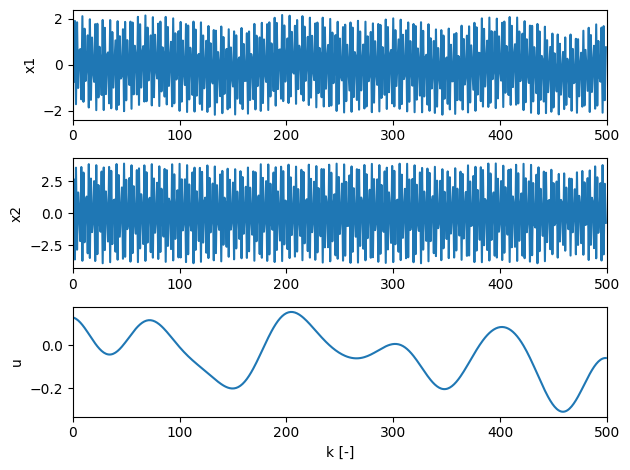

In [43]:
nprint = 500
istart = 2000

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
# Plot on each subplot
ax1.plot(x[istart:istart+nprint,0])
ax1.set_ylabel("x1")
ax1.set_xlim([0, nprint])
ax2.plot(x[istart:istart+nprint,1])
ax2.set_ylabel("x2")
ax2.set_xlim([0, nprint])
ax3.plot(u[istart:istart+nprint])
ax3.set_ylabel("u")
ax3.set_xlim([0, nprint])
ax3.set_xlabel("k [-]")
# Adjust layout (optional)
plt.tight_layout()
# Display the plot
plt.show()

In [44]:
# check if solveable with LSQ
input = x[:-1,:]
output = x[1:,:]

u_input = u[:-1]
Theta = np.c_[input[:,0], input[:,1], u_input, np.sin(input[:,0])]

coeff, _, _, _ = lin.lstsq(Theta, output)
print("LSTSQ: \n{}\ntrue coeff: {}".format(coeff, th))

U, s, Vh = lin.svd(Theta[:10000,:])
print("eigval: {}".format(s))

LSTSQ: 
[[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 2.28116137e-16  4.30000000e+00]
 [-3.88578059e-16 -1.10000000e+00]]
true coeff: [ 1.  -3.  -1.1 -3.7  4.3]
eigval: [314.12920816  38.57460912  17.09301392   9.91153798]


In [45]:
# th_mdic = {"th": th}
# u_mdic = {"u": u}
# x_mdic = {"x": x}
# y_mdic = {"y": y}

# savemat( "SILVERSIN_c_data.mat", th_mdic)
# savemat("SILVERSIN_u_data.mat", u_mdic)
# savemat("SILVERSIN_x_data.mat", x_mdic)
# savemat("SILVERSIN_y_data.mat", y_mdic)